In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [27]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In this notebook, we will build a simple NN model to predict some data

In [16]:

# preprocessing
cut_labeling = {col: val for val, col in enumerate(['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'])}
color_labeling = {col: val for val, col in enumerate(['J', 'I', 'H', 'G', 'F', 'E', 'D'])}
clarity_labeling = {col: val for val, col in enumerate(
    ['I3', 'I2', 'I1', 'SI2', 'SI1', 'VVS2', 'VVS1', 'VS2', 'VS1', 'IF', 'FL'])}
# to preprocess label features, map label to integer number.
def preprocessing(df):
    df['cut'] = df['cut'].map(cut_labeling)
    df['color'] = df['color'].map(color_labeling)
    df['clarity'] = df['clarity'].map(clarity_labeling)
    return df

train_df = preprocessing(train_df)

train_df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,3,4,7,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,2,0,3,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,4,3,8,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,4,3,8,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,3,3,7,62.6,59.0,7.65,7.61,4.77,14453


In [19]:
# Now we need to turn the data into a feature tensor and a target tensor
feature_col = ['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z']
train_x = tf.convert_to_tensor(
    train_df[feature_col])
train_y = tf.convert_to_tensor(
    train_df['price']
)

In [20]:
# Specify some simple parameters
EPOCH_NUM = 15
BATCH_SIZE = 256

In [24]:
# Now we can build a model
model = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(16, activation='relu'),
        tf.keras.layers.Dense(8, activation='relu'),
        tf.keras.layers.Dense(1)
    ]
)

In [25]:
model.compile(optimizer='adam',
              loss='mse',
              metrics=[tf.keras.metrics.RootMeanSquaredError()])
history = model.fit(train_x, train_y, epochs=2*EPOCH_NUM, batch_size=BATCH_SIZE)

Epoch 1/30
  7/757 [..............................] - ETA: 6s - loss: 34725120.0000 - root_mean_squared_error: 5892.8027  

2023-02-25 20:51:10.945596: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


757/757 [==============================] - 6s 8ms/step - loss: 21440162.0000 - root_mean_squared_error: 4630.3525
Epoch 2/30
757/757 [==============================] - 6s 8ms/step - loss: 14707294.0000 - root_mean_squared_error: 3835.0093
Epoch 3/30
757/757 [==============================] - 6s 8ms/step - loss: 12180304.0000 - root_mean_squared_error: 3490.0293
Epoch 4/30
757/757 [==============================] - 6s 8ms/step - loss: 7379534.0000 - root_mean_squared_error: 2716.5298
Epoch 5/30
757/757 [==============================] - 5s 7ms/step - loss: 3803349.7500 - root_mean_squared_error: 1950.2179
Epoch 6/30
757/757 [==============================] - 6s 7ms/step - loss: 2209473.0000 - root_mean_squared_error: 1486.4297
Epoch 7/30
757/757 [==============================] - 6s 8ms/step - loss: 1385131.8750 - root_mean_squared_error: 1176.9163
Epoch 8/30
757/757 [==============================] - 6s 7ms/step - loss: 1040597.1250 - root_mean_squared_error: 1020.0967
Epoch 9/30
757/7

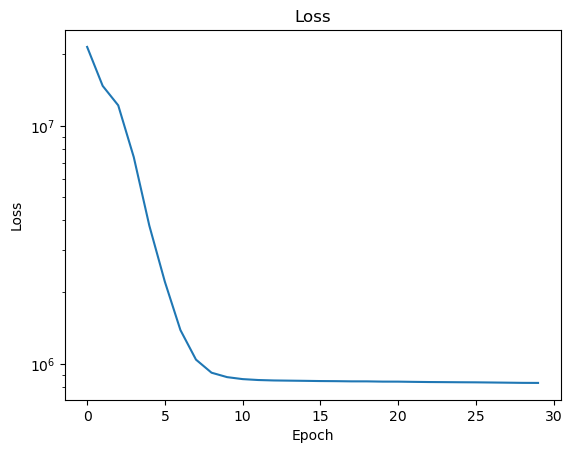

In [26]:
loss = history.history['loss']

plt.plot(loss)
plt.yscale('log')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

Now we want to run this on the actual test data

In [28]:
test_df = preprocessing(test_df)
test_df = tf.convert_to_tensor(test_df[feature_col])

In [29]:
# Make prediction
y_pred = model.predict(test_df)

  69/4033 [..............................] - ETA: 8s

2023-02-25 20:58:28.520719: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


4033/4033 [==============================] - 9s 2ms/step


In [34]:
# Load submission df to replace
submission_df = pd.read_csv('sample_submission.csv', index_col='id')
submission_df['price'] = y_pred

# create submission
submission_df.to_csv('submission_nn.csv')